# GameTheory-1-Setup

**Navigation** : [Index](README.md) | [2-NormalForm >>](GameTheory-2-NormalForm.ipynb)

## Installation et Configuration de l'Environnement

Ce notebook configure **automatiquement** l'environnement pour la serie de notebooks sur la **Theorie des Jeux**.

### Objectifs d'apprentissage

A la fin de ce notebook, vous saurez :
1. Installer et verifier les bibliotheques principales (Nashpy, OpenSpiel)
2. Comprendre la structure de la serie de 19 notebooks
3. Modeliser un jeu simple avec une matrice de gains
4. Trouver un equilibre de Nash avec Nashpy

### Prerequis

- Python 3.9+ installe
- Connaissances basiques en Python et NumPy

### Duree estimee : 20 minutes

---

## 1. Detection de l'environnement

Commencons par detecter le systeme d'exploitation et la configuration Python.

In [1]:
# Detection de l'environnement
import sys
import os
import platform
import subprocess
import shutil
from pathlib import Path

# Informations systeme
OS_NAME = platform.system()  # 'Windows', 'Linux', 'Darwin'
OS_VERSION = platform.version()
PYTHON_VERSION = sys.version_info
IS_WINDOWS = OS_NAME == 'Windows'
IS_LINUX = OS_NAME == 'Linux'
IS_MAC = OS_NAME == 'Darwin'

print(f"Systeme d'exploitation: {OS_NAME}")
print(f"Version Python: {PYTHON_VERSION.major}.{PYTHON_VERSION.minor}.{PYTHON_VERSION.micro}")
print(f"Repertoire de travail: {os.getcwd()}")
print(f"Executable Python: {sys.executable}")

Systeme d'exploitation: Linux
Version Python: 3.12.3
Repertoire de travail: /home/jesse
Executable Python: /home/jesse/.gametheory-venv/bin/python3


---

## 2. Installation automatique des dependances

Nous utilisons deux bibliotheques principales pour la theorie des jeux :

| Bibliotheque | Description | Usage dans la serie |
|--------------|-------------|---------------------|
| **Nashpy** | Jeux matriciels 2 joueurs | Notebooks 1-6 : Nash pur/mixte |
| **OpenSpiel** | Framework DeepMind | Notebooks 7-15 : CFR, MCTS, jeux extensifs |

### Note sur OpenSpiel

OpenSpiel est le framework de DeepMind pour la recherche en theorie des jeux. Il necessite une compilation C++ et **n'a pas de wheels pre-compiles pour Windows**.

| Plateforme | Installation OpenSpiel | Recommandation |
|------------|------------------------|----------------|
| **Linux** | `pip install open_spiel` (direct) | Fonctionne |
| **macOS** | `pip install open_spiel` (direct) | Fonctionne |
| **Windows** | Compilation complexe (CMake + Clang) | **Utiliser `game_theory_utils.py`** |

### Alternative recommandee : `game_theory_utils.py`

Ce module fournit des **implementations Python pures** des algorithmes avances :
- **CFRSolver** : Counterfactual Regret Minimization
- **FictitiousPlay** : Apprentissage fictif (converge vers Nash)
- **VCGAuction** : Mecanisme Vickrey-Clarke-Groves
- **gale_shapley** : Matching stable (Gale-Shapley)
- **stackelberg_duopoly**, **cournot_duopoly** : Equilibres de marche

Cette alternative permet de suivre **tous les notebooks (1-15)** sans OpenSpiel.

### 2.1 Installation des dependances de base

In [2]:
# Installation des dependances de base (fonctionne sur toutes les plateformes)
def install_package(package_name, import_name=None):
    """Installe un package s'il n'est pas deja installe."""
    if import_name is None:
        import_name = package_name
    try:
        __import__(import_name)
        return True
    except ImportError:
        print(f"Installation de {package_name}...")
        result = subprocess.run(
            [sys.executable, '-m', 'pip', 'install', package_name, '-q'],
            capture_output=True, text=True
        )
        if result.returncode == 0:
            print(f"  {package_name} installe avec succes")
            return True
        else:
            print(f"  Echec installation {package_name}: {result.stderr}")
            return False

# Packages essentiels
PACKAGES = [
    ('nashpy', 'nashpy'),
    ('numpy', 'numpy'),
    ('scipy', 'scipy'),
    ('matplotlib', 'matplotlib'),
    ('networkx', 'networkx'),
    ('seaborn', 'seaborn'),
    ('pandas', 'pandas'),
    ('tqdm', 'tqdm'),
]

print("Verification et installation des dependances de base...")
print("=" * 50)
for pkg_name, import_name in PACKAGES:
    install_package(pkg_name, import_name)
print("=" * 50)
print("Installation des dependances de base terminee.")

Verification et installation des dependances de base...
Installation des dependances de base terminee.


### 2.2 Verification de Nashpy

In [3]:
# Verification de Nashpy
try:
    import nashpy as nash
    print(f"Nashpy version: {nash.__version__}")
    NASHPY_OK = True
except ImportError as e:
    print(f"ERREUR: Nashpy non installe: {e}")
    print("Solution: pip install nashpy")
    NASHPY_OK = False

# Sortie attendue: Nashpy version: 0.0.4x

Nashpy version: 0.0.43


### 2.3 Installation d'OpenSpiel (selon la plateforme)

Cette section tente d'installer OpenSpiel automatiquement selon votre systeme.

In [4]:
# Verification si OpenSpiel est deja installe
def check_openspiel():
    """Verifie si OpenSpiel est disponible."""
    try:
        import pyspiel
        return True, len(pyspiel.registered_names())
    except ImportError:
        return False, 0

OPENSPIEL_OK, GAMES_COUNT = check_openspiel()

if OPENSPIEL_OK:
    print(f"OpenSpiel deja installe: {GAMES_COUNT} jeux disponibles")
else:
    print("OpenSpiel non installe. Tentative d'installation automatique...")

OpenSpiel deja installe: 114 jeux disponibles


### Tentative d'installation automatique d'OpenSpiel

Le code ci-dessous detecte la plateforme et tente d'installer OpenSpiel :
- **Linux/macOS** : Installation directe via `pip install open_spiel`
- **Windows** : Affiche un message expliquant les alternatives (compilation complexe, WSL, ou `game_theory_utils.py`)

Sur Windows, la compilation d'OpenSpiel necessite CMake et Clang, ce qui est une configuration lourde. C'est pourquoi nous fournissons `game_theory_utils.py` comme alternative Python pure.

In [5]:
# Installation d'OpenSpiel selon la plateforme
def install_openspiel():
    """Tente d'installer OpenSpiel selon la plateforme."""
    global OPENSPIEL_OK, GAMES_COUNT
    
    if OPENSPIEL_OK:
        return True
    
    if IS_LINUX or IS_MAC:
        # Sur Linux/Mac, installation directe
        print("Plateforme Linux/Mac detectee - installation directe...")
        result = subprocess.run(
            [sys.executable, '-m', 'pip', 'install', 'open_spiel', '-q'],
            capture_output=True, text=True
        )
        if result.returncode == 0:
            OPENSPIEL_OK, GAMES_COUNT = check_openspiel()
            if OPENSPIEL_OK:
                print(f"OpenSpiel installe avec succes: {GAMES_COUNT} jeux")
                return True
        print(f"Echec installation OpenSpiel: {result.stderr[:200] if result.stderr else 'erreur inconnue'}")
        return False
    
    elif IS_WINDOWS:
        print("=" * 60)
        print("WINDOWS DETECTE - OpenSpiel non disponible via pip")
        print("=" * 60)
        print()
        print("OpenSpiel n'a pas de wheels pre-compiles pour Windows.")
        print("La compilation depuis les sources necessite:")
        print("  - CMake")
        print("  - Clang (recommande par OpenSpiel, pas MinGW)")
        print("  - Configuration complexe du build system")
        print()
        print("ALTERNATIVES RECOMMANDEES:")
        print("-" * 60)
        print("1. Utiliser game_theory_utils.py (inclus dans ce repertoire)")
        print("   -> Fournit CFR, Fictitious Play, VCG, Gale-Shapley, etc.")
        print("   -> Suffisant pour tous les notebooks de la serie")
        print()
        print("2. Utiliser WSL (Windows Subsystem for Linux)")
        print("   -> Installer WSL: wsl --install")
        print("   -> Dans WSL: pip install open_spiel")
        print()
        print("3. Utiliser Google Colab (Linux cloud)")
        print("   -> Les notebooks fonctionnent directement")
        print("=" * 60)
        return False
    
    else:
        print(f"Plateforme {OS_NAME} non supportee pour OpenSpiel.")
        return False

# Lancer l'installation si OpenSpiel n'est pas deja disponible
if not OPENSPIEL_OK:
    install_openspiel()

### 2.4 Verification des bibliotheques de support

In [6]:
# Verification des bibliotheques de support
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

print(f"NumPy version:    {np.__version__}")
print(f"NetworkX version: {nx.__version__}")

NumPy version:    2.4.1
NetworkX version: 3.6.1


### 2.5 Verification de game_theory_utils.py (alternative a OpenSpiel)

In [7]:
# Verification de game_theory_utils.py
# Ce module fournit des implementations Python pures des algorithmes avances
# si OpenSpiel n'est pas disponible

UTILS_OK = False
try:
    from game_theory_utils import (
        CFRSolver, FictitiousPlay, create_rps_matrix,
        VCGAuction, gale_shapley,
        stackelberg_duopoly, cournot_duopoly
    )
    print("game_theory_utils.py charge avec succes")
    print("  Classes disponibles:")
    print("    - CFRSolver: Counterfactual Regret Minimization")
    print("    - FictitiousPlay: Apprentissage fictif")
    print("    - VCGAuction: Mecanisme VCG")
    print("    - gale_shapley: Matching stable")
    print("    - stackelberg_duopoly, cournot_duopoly: Equilibres de marche")
    UTILS_OK = True
except ImportError as e:
    print(f"game_theory_utils.py non disponible: {e}")
    print("Les notebooks avances (12-15) pourraient ne pas fonctionner.")

game_theory_utils.py non disponible: No module named 'game_theory_utils'
Les notebooks avances (12-15) pourraient ne pas fonctionner.


### 2.6 Resume de l'environnement

In [8]:
# Resume de l'environnement
print("=" * 60)
print("RESUME DE L'ENVIRONNEMENT")
print("=" * 60)
print(f"Plateforme:      {OS_NAME}")
print(f"Python:          {PYTHON_VERSION.major}.{PYTHON_VERSION.minor}.{PYTHON_VERSION.micro}")
print("-" * 60)
print(f"Nashpy:          {'OK' if NASHPY_OK else 'MANQUANT (REQUIS)'}")
print(f"OpenSpiel:       {'OK (' + str(GAMES_COUNT) + ' jeux)' if OPENSPIEL_OK else 'Non disponible'}")
print(f"game_theory_utils: {'OK' if UTILS_OK else 'Non disponible'}")
print(f"NumPy:           OK")
print(f"NetworkX:        OK")
print("=" * 60)

if NASHPY_OK:
    print("\nEnvironnement pret pour les notebooks 1-6.")
    
    if OPENSPIEL_OK:
        print("OpenSpiel disponible pour les notebooks avances (7-15).")
    elif UTILS_OK:
        print("OpenSpiel non disponible, mais game_theory_utils.py fournit")
        print("des alternatives Python pour les notebooks avances.")
    else:
        print("Pour les notebooks 7-15, vous aurez besoin d'OpenSpiel")
        print("ou de game_theory_utils.py.")
else:
    print("\nATTENTION: Installez Nashpy avant de continuer.")
    print("Commande: pip install nashpy")

RESUME DE L'ENVIRONNEMENT
Plateforme:      Linux
Python:          3.12.3
------------------------------------------------------------
Nashpy:          OK
OpenSpiel:       OK (114 jeux)
game_theory_utils: Non disponible
NumPy:           OK
NetworkX:        OK

Environnement pret pour les notebooks 1-6.
OpenSpiel disponible pour les notebooks avances (7-15).


### 2.7 Configuration WSL pour OpenSpiel (Windows uniquement)

Sur Windows, OpenSpiel ne peut pas etre installe directement via pip. La solution recommandee est d'utiliser **WSL (Windows Subsystem for Linux)** avec un kernel Jupyter dedie.

Cette section configure automatiquement :
1. Verification de WSL Ubuntu
2. Installation d'OpenSpiel dans WSL
3. Configuration du kernel Jupyter "Python (GameTheory WSL)"

**Note** : Si vous n'avez pas besoin d'OpenSpiel, vous pouvez ignorer cette section. `game_theory_utils.py` fournit des alternatives Python pures.

In [9]:
# Configuration automatique du kernel WSL pour OpenSpiel (Windows uniquement)
# 
# IMPORTANT: Ce code cree un wrapper bash qui gere la conversion des chemins Windows->Linux.
# Le probleme principal est que VSCode passe les chemins avec des backslashes qui sont
# "consommes" par le shell WSL avant d'arriver au script Python.
#
# Solution: Un wrapper bash avec regex qui reconstruit le chemin.
# Voir install_wsl_kernel.md pour plus de details.

import subprocess
import json
import os
from pathlib import Path

class WSLOpenSpielManager:
    """Gestionnaire du kernel Python WSL avec OpenSpiel"""
    
    def __init__(self):
        self.is_windows = platform.system() == "Windows"
        self.kernel_name = "gametheory-wsl"
        self.kernel_path = Path(os.environ.get("APPDATA", "")) / "jupyter" / "kernels" / self.kernel_name
        self.venv_path = "~/.gametheory-venv"
        self.wrapper_path = "~/.gametheory-kernel-wrapper.sh"
    
    def _safe_decode(self, data: bytes) -> str:
        """Decode bytes safely"""
        return data.decode('utf-8', errors='replace')
    
    def _run_wsl_command(self, cmd: str, timeout: int = 30) -> tuple:
        """Execute une commande dans WSL et retourne (success, stdout, stderr)"""
        try:
            result = subprocess.run(
                ["wsl.exe", "-d", "Ubuntu", "--", "bash", "-c", cmd],
                capture_output=True, timeout=timeout
            )
            return (
                result.returncode == 0,
                self._safe_decode(result.stdout).strip(),
                self._safe_decode(result.stderr).strip()
            )
        except subprocess.TimeoutExpired:
            return (False, "", "Timeout")
        except Exception as e:
            return (False, "", str(e))
    
    def check_wsl_available(self) -> dict:
        """Verifie si WSL est disponible"""
        if not self.is_windows:
            return {"available": False, "reason": "Non Windows - WSL non necessaire"}
        
        try:
            result = subprocess.run(["wsl.exe", "--status"], capture_output=True, timeout=10)
            if result.returncode == 0:
                return {"available": True}
            return {"available": False, "reason": "WSL non configure"}
        except FileNotFoundError:
            return {"available": False, "reason": "WSL non installe"}
        except Exception as e:
            return {"available": False, "reason": str(e)}
    
    def check_wsl_openspiel(self) -> dict:
        """Verifie si OpenSpiel est installe dans WSL"""
        success, stdout, stderr = self._run_wsl_command(
            f"source {self.venv_path}/bin/activate 2>/dev/null && "
            "python3 -c \"import pyspiel; print(len(pyspiel.registered_names()))\"",
            timeout=30
        )
        if success and stdout.isdigit():
            return {"installed": True, "games_count": int(stdout)}
        return {"installed": False, "reason": stderr or "OpenSpiel non installe dans WSL"}
    
    def install_openspiel_wsl(self) -> bool:
        """Installe OpenSpiel dans WSL"""
        print("[*] Installation d'OpenSpiel dans WSL (peut prendre quelques minutes)...")
        
        commands = f"""
        if [ ! -d {self.venv_path} ]; then
            python3 -m venv {self.venv_path}
        fi
        source {self.venv_path}/bin/activate
        pip install --upgrade pip -q
        pip install open_spiel nashpy numpy scipy matplotlib ipykernel -q
        python3 -c "import pyspiel; print(f'OK: {{len(pyspiel.registered_names())}} jeux')"
        """
        
        success, stdout, stderr = self._run_wsl_command(commands, timeout=300)
        if success and "OK:" in stdout:
            print(f"[+] {stdout}")
            return True
        print(f"[!] Echec: {stderr[:200] if stderr else 'erreur inconnue'}")
        return False
    
    def create_wrapper_script(self, wsl_user: str) -> bool:
        """Cree le wrapper bash dans WSL qui gere la conversion des chemins"""
        print("[*] Creation du wrapper script...")
        
        venv_expanded = self.venv_path.replace("~", f"/home/{wsl_user}")
        wrapper_expanded = self.wrapper_path.replace("~", f"/home/{wsl_user}")
        
        # Script wrapper qui gere:
        # 1. Tilde notation: ~\\AppData\\...
        # 2. Backslashes strippes: c:UsersjsboiAppDataRoamingjupyterruntime...
        # 3. Chemins Windows normaux: C:\\Users\\...
        wrapper_content = f'''#!/bin/bash
# Kernel wrapper for WSL - handles Windows path conversion
# Handles: tilde notation, stripped backslashes, normal Windows paths

LOGFILE="/tmp/kernel-wrapper.log"
echo "=== Kernel wrapper started ===" > "$LOGFILE"
echo "Args: $@" >> "$LOGFILE"

ARGS=()
NEXT_IS_CONN=false

for arg in "$@"; do
    if [ "$NEXT_IS_CONN" = true ]; then
        echo "Original path: $arg" >> "$LOGFILE"

        # Case 1: Tilde notation (~\\AppData\\...)
        if [[ "$arg" == ~* ]]; then
            WIN_HOME=$(cmd.exe /c "echo %USERPROFILE%" 2>/dev/null | tr -d "\\r\\n")
            arg="${{WIN_HOME}}${{arg:1}}"
            echo "After tilde expansion: $arg" >> "$LOGFILE"
        fi

        # Case 2: Backslashes stripped (c:UsersjsboiAppDataRoamingjupyterruntime...)
        if [[ "$arg" =~ ^c:Users([a-zA-Z0-9_]+)AppDataRoamingjupyterruntime(.*)$ ]]; then
            USERNAME="${{BASH_REMATCH[1]}}"
            FILENAME="${{BASH_REMATCH[2]}}"
            arg="C:\\\\Users\\\\${{USERNAME}}\\\\AppData\\\\Roaming\\\\jupyter\\\\runtime\\\\${{FILENAME}}"
            echo "Reconstructed path: $arg" >> "$LOGFILE"
        fi

        # Convert Windows path to Linux path
        if [[ "$arg" == *":"* ]] || [[ "$arg" == *"\\\\"* ]]; then
            LINUX_PATH=$(wslpath -u "$arg" 2>/dev/null)
            if [ -n "$LINUX_PATH" ]; then
                arg="$LINUX_PATH"
            fi
        fi

        echo "Final path: $arg" >> "$LOGFILE"
        ARGS+=("$arg")
        NEXT_IS_CONN=false
    elif [ "$arg" = "-f" ]; then
        ARGS+=("$arg")
        NEXT_IS_CONN=true
    else
        ARGS+=("$arg")
    fi
done

echo "Final args: ${{ARGS[@]}}" >> "$LOGFILE"
echo "Launching ipykernel..." >> "$LOGFILE"

export PATH="{venv_expanded}/bin:$PATH"
cd ~
exec {venv_expanded}/bin/python3 -m ipykernel_launcher "${{ARGS[@]}}"
'''
        
        # Ecrire le script via fichier temporaire (evite les problemes d'echappement)
        import tempfile
        with tempfile.NamedTemporaryFile(mode='w', suffix='.sh', delete=False, newline='\n') as f:
            f.write(wrapper_content)
            temp_path = f.name
        
        # Copier vers WSL
        wsl_temp = f"/mnt/{temp_path[0].lower()}/{temp_path[3:].replace(chr(92), '/')}"
        success, _, stderr = self._run_wsl_command(
            f"cp '{wsl_temp}' {wrapper_expanded} && chmod +x {wrapper_expanded}"
        )
        
        # Nettoyer
        os.unlink(temp_path)
        
        if success:
            # Verifier la syntaxe
            success, _, stderr = self._run_wsl_command(f"bash -n {wrapper_expanded}")
            if success:
                print(f"[+] Wrapper cree: {wrapper_expanded}")
                return True
            print(f"[!] Erreur syntaxe: {stderr}")
        else:
            print(f"[!] Echec copie: {stderr}")
        return False
    
    def install_kernel(self) -> bool:
        """Installe le kernel Jupyter pour WSL avec wrapper script"""
        print("[*] Configuration du kernel Jupyter WSL...")
        
        # Creer le dossier du kernel
        self.kernel_path.mkdir(parents=True, exist_ok=True)
        
        # Obtenir le nom d'utilisateur WSL
        success, wsl_user, _ = self._run_wsl_command("whoami")
        if not success or not wsl_user:
            wsl_user = "root"
        
        # Creer le wrapper script
        if not self.create_wrapper_script(wsl_user):
            return False
        
        wrapper_expanded = self.wrapper_path.replace("~", f"/home/{wsl_user}")
        
        # Creer kernel.json avec le wrapper bash
        kernel_json = {
            "argv": [
                "wsl.exe", "-d", "Ubuntu", "--",
                "bash", wrapper_expanded,
                "-f", "{connection_file}"
            ],
            "display_name": "Python (GameTheory WSL + OpenSpiel)",
            "language": "python"
        }
        
        kernel_file = self.kernel_path / "kernel.json"
        with open(kernel_file, 'w') as f:
            json.dump(kernel_json, f, indent=2)
        
        print(f"[+] Kernel cree: {kernel_file}")
        return True
    
    def run_diagnostic(self):
        """Execute le diagnostic complet et configure WSL si necessaire"""
        print("=" * 60)
        print("    CONFIGURATION WSL POUR OPENSPIEL")
        print("=" * 60)
        
        if not self.is_windows:
            print("\n[OK] Vous n'etes pas sur Windows.")
            print("     OpenSpiel peut etre installe directement: pip install open_spiel")
            return
        
        # 1. Verifier WSL
        print("\n[1/4] Verification de WSL...")
        wsl_status = self.check_wsl_available()
        if wsl_status.get("available"):
            print("      [OK] WSL disponible")
        else:
            print(f"      [!] {wsl_status.get('reason', 'Non disponible')}")
            print("\n      Pour installer WSL, executez en PowerShell Admin:")
            print("      wsl --install -d Ubuntu")
            return
        
        # 2. Verifier OpenSpiel dans WSL
        print("\n[2/4] Verification d'OpenSpiel dans WSL...")
        openspiel_status = self.check_wsl_openspiel()
        if openspiel_status.get("installed"):
            print(f"      [OK] OpenSpiel installe: {openspiel_status['games_count']} jeux")
        else:
            print(f"      [~] {openspiel_status.get('reason', 'Non installe')}")
            print("\n[3/4] Installation d'OpenSpiel dans WSL...")
            if not self.install_openspiel_wsl():
                print("      [!] Echec de l'installation")
                print("      Voir install_wsl_kernel.md pour l'installation manuelle")
                return
        
        # 4. Configurer le kernel
        print("\n[4/4] Configuration du kernel Jupyter...")
        if self.install_kernel():
            print("\n" + "=" * 60)
            print("[OK] Configuration WSL terminee !")
            print("\n     Pour utiliser OpenSpiel:")
            print("     1. Redemarrez VSCode completement (pas Reload Window)")
            print("     2. Selectionnez le kernel 'Python (GameTheory WSL + OpenSpiel)'")
            print("     3. Si le kernel echoue, verifiez le log:")
            print("        wsl -d Ubuntu -- cat /tmp/kernel-wrapper.log")
            print("=" * 60)
        else:
            print("\n[!] Echec de la configuration du kernel")

# Executer la configuration WSL si on est sur Windows et OpenSpiel n'est pas disponible
if IS_WINDOWS and not OPENSPIEL_OK:
    wsl_manager = WSLOpenSpielManager()
    wsl_manager.run_diagnostic()
elif IS_WINDOWS and OPENSPIEL_OK:
    print("[OK] OpenSpiel deja disponible sur ce systeme.")
else:
    print("[OK] Plateforme Linux/Mac - OpenSpiel installe directement.")

[OK] Plateforme Linux/Mac - OpenSpiel installe directement.


---

## 3. Structure de la serie

Cette serie comprend **19 notebooks** organises en 4 parties progressives :

### Partie 1 : Fondations (Notebooks 1-6)
| # | Notebook | Contenu | Requis |
|---|----------|----------|--------|
| 1 | Setup | Installation, premier exemple | Nashpy |
| 2 | NormalForm | Jeux matriciels, dominance | Nashpy |
| 3 | Topology2x2 | Classification des jeux 2x2 | Nashpy |
| 4 | NashEquilibrium | Equilibres purs et mixtes | Nashpy |
| 5 | ZeroSum-Minimax | Jeux a somme nulle, minimax | Nashpy |
| 6 | EvolutionTrust | Dilemme itere, cooperation | Nashpy |

### Partie 2 : Jeux dynamiques (Notebooks 7-11)
- Forme extensive, arbres de jeu
- Induction arriere et avant
- Jeux bayesiens et reputation

### Partie 3 : Algorithmes avances (Notebooks 12-15)
| # | Notebook | Contenu | Requis |
|---|----------|----------|--------|
| 12 | ImperfectInfo-CFR | Counterfactual Regret Minimization | OpenSpiel ou game_theory_utils |
| 13 | DifferentialGames | Jeux differentiels, Stackelberg | game_theory_utils |
| 14 | MechanismDesign | Conception de mecanismes, VCG | game_theory_utils |
| 15 | MultiAgent-RL | Apprentissage multi-agent | OpenSpiel ou game_theory_utils |

### Partie 4 : Formalisations Lean (Notebooks 16-19)
- Preuves formelles avec Lean 4
- Existence de Nash, jeux combinatoires

---

## 4. Premier exemple : Le Dilemme du Prisonnier

Le **Dilemme du Prisonnier** est le jeu le plus celebre en theorie des jeux. Il illustre le conflit entre rationalite individuelle et interet collectif.

### Scenario

Deux suspects sont arretes et interroges **separement**. Chacun peut :
- **Cooperer** (C) : se taire, ne pas denoncer l'autre
- **Defaire** (D) : denoncer l'autre pour reduire sa peine

Ils ne peuvent pas communiquer et doivent decider simultanement.

### Matrice des gains

Les gains representent l'**utilite** de chaque joueur (ici, l'inverse de la peine). Plus le gain est eleve, mieux c'est.

|  | Joueur Colonne: C | Joueur Colonne: D |
|--|-------------------|-------------------|
| **Joueur Ligne: C** | (3, 3) | (0, 5) |
| **Joueur Ligne: D** | (5, 0) | (1, 1) |

**Comment lire cette matrice ?**
- Chaque cellule contient `(gain Ligne, gain Colonne)`
- Exemple : si Ligne joue **D** et Colonne joue **C**, on lit la cellule (D, C) = **(5, 0)**
  - Ligne obtient 5 (il denonce et s'en sort bien)
  - Colonne obtient 0 (il se tait mais est denonce)

### Interpretation des issues

| Issue | Gains | Interpretation |
|-------|-------|----------------|
| (C, C) | (3, 3) | Cooperation mutuelle - bonne issue collective |
| (D, D) | (1, 1) | Trahison mutuelle - **equilibre de Nash** |
| (C, D) | (0, 5) | Ligne se fait exploiter |
| (D, C) | (5, 0) | Colonne se fait exploiter |

### Implementation avec Nashpy

Modelisons ce jeu avec Nashpy. Nous definissons deux matrices :
- `A` : gains du joueur Ligne
- `B` : gains du joueur Colonne

In [10]:
# Dilemme du Prisonnier avec Nashpy
import nashpy as nash
import numpy as np

# Matrices de gains
# Convention: ligne 0 = Cooperer, ligne 1 = Defaire
#             colonne 0 = Cooperer, colonne 1 = Defaire

# Gains du joueur Ligne
A = np.array([
    [3, 0],  # Ligne coopere: contre C -> 3, contre D -> 0
    [5, 1]   # Ligne defait:  contre C -> 5, contre D -> 1
])

# Gains du joueur Colonne
B = np.array([
    [3, 5],  # Colonne coopere: contre C -> 3, contre D -> 5
    [0, 1]   # Colonne defait:  contre C -> 0, contre D -> 1
])

print("Matrice A (gains Ligne):")
print(A)
print("\nMatrice B (gains Colonne):")
print(B)

Matrice A (gains Ligne):
[[3 0]
 [5 1]]

Matrice B (gains Colonne):
[[3 5]
 [0 1]]


### Creation du jeu bimatriciel

Avec les deux matrices definies, nous pouvons creer un objet `Game` de Nashpy. Cette classe :
- Stocke les deux matrices de gains
- Fournit des methodes pour calculer les equilibres
- Supporte l'affichage formate des matrices

La representation affichee montre les gains de chaque joueur separement pour faciliter l'analyse.

In [11]:
# Creer le jeu bimatriciel
prisoners_dilemma = nash.Game(A, B)

print("Dilemme du Prisonnier")
print("=" * 40)
print(prisoners_dilemma)

# Nashpy affiche les deux matrices cote a cote

Dilemme du Prisonnier
Bi matrix game with payoff matrices:

Row player:
[[3 0]
 [5 1]]

Column player:
[[3 5]
 [0 1]]


### Trouver l'equilibre de Nash

Un **equilibre de Nash** est un profil de strategies ou aucun joueur n'a interet a devier unilateralement.

Nashpy utilise l'algorithme de **support enumeration** pour trouver tous les equilibres.

In [12]:
# Trouver les equilibres de Nash
print("Recherche des equilibres de Nash...")
print("-" * 40)

equilibria = list(prisoners_dilemma.support_enumeration())
print(f"Nombre d'equilibres trouves: {len(equilibria)}")

Recherche des equilibres de Nash...
----------------------------------------
Nombre d'equilibres trouves: 1


### Analyse detaillee de l'equilibre

Le code ci-dessous affiche pour chaque equilibre trouve :
1. **Strategie** : Le vecteur de probabilites sur les actions
   - Format : `[p(Cooperer), p(Defaire)]`
   - Exemple : `[0.0, 1.0]` signifie "jouer Defaire avec probabilite 1"
2. **Action jouee** : L'action effective (celle avec la probabilite maximale)
3. **Gains** : Les utilites obtenues par chaque joueur a l'equilibre

Pour un equilibre en strategies **pures**, les vecteurs contiennent uniquement des 0 et des 1.

In [13]:
# Analyser chaque equilibre
actions = ['Cooperer', 'Defaire']

for i, (sigma_row, sigma_col) in enumerate(equilibria):
    print(f"\nEquilibre {i+1}:")
    print(f"  Strategie Ligne:   {sigma_row}")
    print(f"  Strategie Colonne: {sigma_col}")
    
    # Interpreter: quelle action est jouee ?
    # sigma = [p(Cooperer), p(Defaire)]
    row_action = actions[np.argmax(sigma_row)]
    col_action = actions[np.argmax(sigma_col)]
    print(f"  -> Actions: ({row_action}, {col_action})")
    
    # Calculer les gains a l'equilibre
    # Gain = sigma_row^T @ A @ sigma_col
    payoff_row = sigma_row @ A @ sigma_col
    payoff_col = sigma_row @ B @ sigma_col
    print(f"  -> Gains:   ({payoff_row:.1f}, {payoff_col:.1f})")


Equilibre 1:
  Strategie Ligne:   [0. 1.]
  Strategie Colonne: [0. 1.]
  -> Actions: (Defaire, Defaire)
  -> Gains:   (1.0, 1.0)


### Interpretation du resultat

L'unique equilibre de Nash est **(Defaire, Defaire)** avec gains **(1, 1)**.

**Pourquoi ?** Analysons les incitations :
- Si Colonne joue C : Ligne prefere D (5 > 3)
- Si Colonne joue D : Ligne prefere D (1 > 0)
- Donc D **domine** C pour Ligne (et symetriquement pour Colonne)

**Le paradoxe** : La rationalite individuelle mene a (D, D) avec gains (1, 1), mais la cooperation (C, C) donnerait (3, 3) - meilleur pour tous !

Ce paradoxe est au coeur de nombreux problemes :
- Pollution (chacun pollue car c'est moins couteux)
- Course aux armements
- Surexploitation des ressources communes

---

## 5. Apercu d'OpenSpiel (optionnel)

OpenSpiel est une bibliotheque de DeepMind pour la recherche en theorie des jeux et RL multi-agent. Elle contient des implementations de nombreux jeux et algorithmes.

**Note** : Cette section est optionnelle. Si OpenSpiel n'est pas installe, passez a la section suivante.

In [14]:
# Apercu d'OpenSpiel (optionnel)
if OPENSPIEL_OK:
    import pyspiel
    
    games = pyspiel.registered_names()
    print(f"Nombre total de jeux disponibles: {len(games)}\n")
    
    # Jeux pertinents pour notre serie
    interesting_games = [
        'matrix_pd',      # Dilemme du Prisonnier
        'matrix_rps',     # Pierre-Feuille-Ciseaux
        'matrix_sh',      # Stag Hunt (Chasse au cerf)
        'kuhn_poker',     # Poker simplifie (CFR)
        'tic_tac_toe',    # Morpion
    ]
    
    print("Jeux pertinents pour la serie:")
    print("-" * 40)
    for g in interesting_games:
        status = "disponible" if g in games else "non disponible"
        print(f"  {g}: {status}")
else:
    print("OpenSpiel non disponible - section sautee.")
    print("Les notebooks 1-6 fonctionnent sans OpenSpiel.")
    if UTILS_OK:
        print("game_theory_utils.py fournit des alternatives pour les notebooks avances.")

Nombre total de jeux disponibles: 114

Jeux pertinents pour la serie:
----------------------------------------
  matrix_pd: disponible
  matrix_rps: disponible
  matrix_sh: disponible
  kuhn_poker: disponible
  tic_tac_toe: disponible


### Exemple pratique avec OpenSpiel

Nous allons maintenant charger le Dilemme du Prisonnier depuis la bibliotheque d'OpenSpiel et explorer sa structure interne.

**Note importante** : Les jeux matriciels dans OpenSpiel sont des **jeux simultanees** (les joueurs choisissent en meme temps), pas sequentiels. Pour ce type de jeux, Nashpy est plus adapte. OpenSpiel brille surtout pour les jeux extensifs (arbres de jeu) comme le Poker de Kuhn.

In [15]:
# Exemple: Explorer le Dilemme du Prisonnier avec OpenSpiel
if OPENSPIEL_OK:
    import pyspiel

    # Charger le jeu
    pd_game = pyspiel.load_game("matrix_pd")
    print(f"Jeu: {pd_game.get_type().short_name}")
    print(f"Joueurs: {pd_game.num_players()}")
    print(f"Type: {pd_game.get_type().dynamics}")

    # Note: Les jeux matriciels dans OpenSpiel sont des jeux SIMULTANEES
    # Les deux joueurs choisissent en meme temps, pas sequentiellement
    # Pour jouer, on utilise l'API de jeu normal-form ou on explore les gains

    # Afficher la matrice de gains
    print("\nMatrice de gains du Dilemme du Prisonnier:")
    print("Actions: 0 = Cooperer, 1 = Defaire")

    # Creer un etat initial
    state = pd_game.new_initial_state()
    print(f"\nEtat initial: {state}")
    print(f"Actions legales: {state.legal_actions()}")

    # Pour les jeux matriciels, on utilise plutot les utilitaires de Nashpy
    # ou les algorithmes d'OpenSpiel (CFR, etc.) qui gerent les jeux simultanes
    print("\n-> Pour jouer des jeux matriciels, utilisez Nashpy (plus simple)")
    print("-> OpenSpiel est ideal pour les jeux extensifs (Kuhn Poker, etc.)")
else:
    print("OpenSpiel non disponible - exemple saute.")

Jeu: matrix_pd
Joueurs: 2
Type: Dynamics.SIMULTANEOUS

Matrice de gains du Dilemme du Prisonnier:
Actions: 0 = Cooperer, 1 = Defaire

Etat initial: Terminal? false
Row actions: Cooperate Defect 
Col actions: Cooperate Defect 
Utility matrix:
5,5 0,10 
10,0 1,1 

Actions legales: [0, 1, 2, 3]

-> Pour jouer des jeux matriciels, utilisez Nashpy (plus simple)
-> OpenSpiel est ideal pour les jeux extensifs (Kuhn Poker, etc.)


---

## 6. Visualisation de la matrice de gains

Visualisons la matrice de gains du Dilemme du Prisonnier. Les couleurs indiquent le gain total (somme des deux joueurs).

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_payoff_matrix(A, B, title="Matrice des gains", labels=None, 
                       highlight_nash=None):
    """
    Visualise une matrice de gains pour un jeu 2x2.
    
    Args:
        A: Matrice des gains du joueur Ligne
        B: Matrice des gains du joueur Colonne
        title: Titre du graphique
        labels: Liste des noms d'actions [action0, action1]
        highlight_nash: Tuple (i, j) de l'equilibre de Nash a surligner
    """
    if labels is None:
        labels = ['Action 0', 'Action 1']
    
    fig, ax = plt.subplots(figsize=(7, 6))
    
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    
    # Dessiner les cellules
    for i in range(2):
        for j in range(2):
            total = A[i, j] + B[i, j]
            color = plt.cm.RdYlGn(total / 10)  # Normaliser sur 0-10
            
            # Surligner l'equilibre de Nash
            linewidth = 4 if highlight_nash == (i, j) else 2
            edgecolor = 'blue' if highlight_nash == (i, j) else 'black'
            
            rect = plt.Rectangle((j-0.5, 1.5-i-1), 1, 1, 
                                   facecolor=color, edgecolor=edgecolor, 
                                   linewidth=linewidth)
            ax.add_patch(rect)
            
            # Afficher les gains
            ax.text(j, 1-i, f"({A[i,j]}, {B[i,j]})", 
                   ha='center', va='center', fontsize=16, fontweight='bold')
    
    # Labels et titres
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(labels, fontsize=12)
    ax.set_yticklabels(labels[::-1], fontsize=12)
    ax.set_xlabel('Joueur Colonne', fontsize=13, fontweight='bold')
    ax.set_ylabel('Joueur Ligne', fontsize=13, fontweight='bold')
    ax.set_title(title, fontsize=15, fontweight='bold', pad=15)
    
    # Legende
    if highlight_nash:
        ax.text(0.5, -0.35, "Cadre bleu = Equilibre de Nash", 
               ha='center', fontsize=10, style='italic',
               transform=ax.transAxes)
    
    ax.set_aspect('equal')
    plt.tight_layout()
    plt.show()

### Utilisation de la fonction de visualisation

Nous allons maintenant utiliser cette fonction pour afficher la matrice du Dilemme du Prisonnier. Le code ci-dessous :
- Passe les matrices `A` et `B` definies precedemment
- Utilise les labels 'Cooperer' et 'Defaire' pour les actions
- Surligne l'equilibre de Nash en (1, 1) avec un cadre bleu

La couleur des cellules represente le **gain total** (somme des utilites des deux joueurs) :
- **Vert** : gain total eleve (issue optimale socialement)
- **Jaune/Orange** : gain total moyen
- **Rouge** : gain total faible

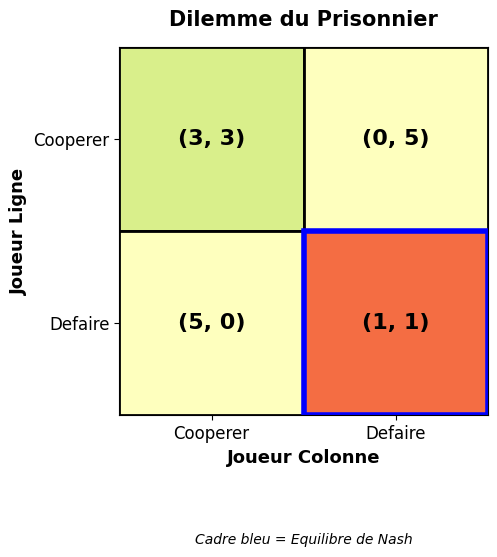

In [17]:
# Visualiser le Dilemme du Prisonnier
# L'equilibre de Nash est en (1, 1) = (Defaire, Defaire)
plot_payoff_matrix(
    A, B, 
    title="Dilemme du Prisonnier",
    labels=['Cooperer', 'Defaire'],
    highlight_nash=(1, 1)
)

**Observation** : La cellule (C, C) est la plus verte (gain total = 6), mais l'equilibre de Nash est (D, D) en jaune-orange (gain total = 2). C'est le coeur du dilemme !

---

## 7. Exercice : Autres jeux classiques

Modifiez les gains pour creer d'autres jeux celebres. Utilisez `support_enumeration()` pour trouver leurs equilibres.

### Exercice 1 : Jeu de coordination (Stag Hunt)

Dans la **Chasse au cerf**, deux chasseurs peuvent :
- Chasser le cerf ensemble (necessite cooperation) -> gain eleve
- Chasser le lievre seul (sur) -> gain moyen

Matrice suggeree :
| | C | D |
|--|---|---|
| **C** | (4, 4) | (0, 3) |
| **D** | (3, 0) | (3, 3) |

In [18]:
# Exercice 1 : Stag Hunt
# Decommenter et completer

# A_stag = np.array([[4, 0],
#                    [3, 3]])
# B_stag = np.array([[4, 3],
#                    [0, 3]])

# stag_hunt = nash.Game(A_stag, B_stag)
# print("Equilibres de Nash du Stag Hunt:")
# for eq in stag_hunt.support_enumeration():
#     print(eq)

# Question: Combien d'equilibres de Nash ce jeu a-t-il ?

### Exercice 2 : Jeu a somme nulle (Pierre-Feuille-Ciseaux)

Dans un jeu a **somme nulle**, les gains d'un joueur sont exactement les pertes de l'autre : `A + B = 0`.

Matrice de Pierre-Feuille-Ciseaux (gain de Ligne) :
| | Pierre | Feuille | Ciseaux |
|--|--------|---------|--------|
| **Pierre** | 0 | -1 | 1 |
| **Feuille** | 1 | 0 | -1 |
| **Ciseaux** | -1 | 1 | 0 |

In [19]:
# Exercice 2 : Pierre-Feuille-Ciseaux
# Decommenter et completer

# A_rps = np.array([[0, -1, 1],
#                   [1, 0, -1],
#                   [-1, 1, 0]])
# B_rps = -A_rps  # Somme nulle

# rps = nash.Game(A_rps, B_rps)
# print("Equilibres de Nash de Pierre-Feuille-Ciseaux:")
# for eq in rps.support_enumeration():
#     print(eq)

# Question: L'equilibre est-il en strategies pures ou mixtes ?

---

## 8. Prochaines etapes

L'environnement est maintenant configure. Voici la suite de la serie :

| Notebook | Contenu | Concepts cles |
|----------|---------|---------------|
| **GameTheory-2-NormalForm** | Jeux en forme normale | Dominance, best response, rationalite |
| **GameTheory-3-Topology2x2** | Classification des jeux 2x2 | Table periodique de Robinson-Goforth |
| **GameTheory-4-NashEquilibrium** | Equilibres Nash | Strategies mixtes, calcul, existence |

### Points cles a retenir

1. Un **jeu** est defini par des joueurs, des actions, et des gains
2. Un **equilibre de Nash** est stable : personne ne veut devier seul
3. L'equilibre n'est pas forcement optimal collectivement (cf. Dilemme du Prisonnier)
4. **Nashpy** permet de calculer les equilibres avec `support_enumeration()`

---

**Notebook suivant** : [GameTheory-2-NormalForm](GameTheory-2-NormalForm.ipynb)